In [1]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj10.csv')

In [2]:
track_name = data_pd.trackName.unique()
len(track_name)

5044

In [3]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0                  Los Chikos del Maiz            639
1                      John Frusciante            482
2                           Pink Floyd            232
3                            Daft Punk            188
4                        Fleetwood Mac            171
5                               Pixies            160
6                  Camille Saint-Saëns            158
7                          Extremoduro            140
8  La Maravillosa Orquesta del Alcohol            134
9                            Manu Chao            131

<AxesSubplot:ylabel='Artist'>

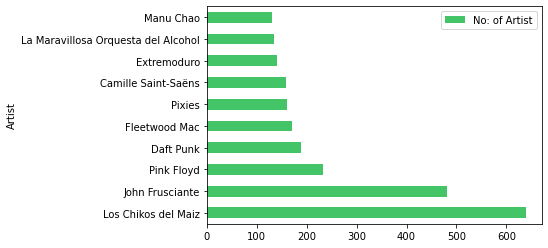

In [4]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [5]:
df1_list = df1['Artist'].head(10).tolist()

In [6]:
print(df1_list)

['Los Chikos del Maiz', 'John Frusciante', 'Pink Floyd', 'Daft Punk', 'Fleetwood Mac', 'Pixies', 'Camille Saint-Saëns', 'Extremoduro', 'La Maravillosa Orquesta del Alcohol', 'Manu Chao']


In [7]:
import numpy as np
a =np.array(df1_list).astype(str)

In [8]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Copenhague', "Why'd You Only Call Me When You're High?", "Alright Alright (Here's My Fist Where's the Fight ?)", 'Here If You Want (Pale Blue)', 'Sense', 'California Kids', 'Engineer Says', 'Telescope', 'Fluorescent Adolescent', 'Too Late To Say Goodbye', 'The View From The Afternoon', 'Curtains', 'Island In The Sun', 'Cha-Cha Twist', 'Stuck on the puzzle', 'Lightning Bolt', 'What Became of the Likely Lads', 'Addict Like Me', 'The Ultracheese', "Can't Stand Me Now", 'Arabella', 'Do I Wanna Know?', 'Feel Good Inc.', 'Forrowest', 'Gotham City', 'Amiga Da Minha Mulher', 'A Minha Menina', 'Baby', 'Bat Macumba', 'Mais Que Nada', 'Mistério do Planeta', 'O Pirata', 'Mama África', 'O Velho e o Mar', 'Vagabundo não é fácil', 'El Justiceiro', 'Take It Easy My Brother Charles', 'Da Lama ao Caos', 'Más Alto', 'Dime Cuánto', 'Psycho Broders', 'Danger', 'Mueve mueve', 'SERÁ POR ALGO', 'Esclavos de lo ilegal', 'Belfast', 'Barco a la deriva', 'Etapas raras', 'Pena', 'Dinamo', 'Crudo', 'Malamanera', 

In [9]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [10]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['4bZEZhCq2kqUxnMacXVl5x', '086myS9r57YsLbJpU0TgK9', '6dkvErYa3YQiAKaQROakdb', '7a0mPDySTtLmgE3NoIBNJp', '2WWBXo8SVGSi3Z4oB7yQDi', '0UbS4oWIo2nUXeTxsvFaN1', '5mCpBoZKqoV9Vh5iS1LJ6L', '5dyfHe3tR7wyzfuNo0uu3Y', '2x8evxqUlF0eRabbW2JBJd', '48sc7vBJeNoCEQhxO3zYKA', '5eyTC5GZzpzlN7YRO9AoPf', '51LeDAMy6nWqKdjVo7jK4j', '6MSkhkM5ZI9C9JBsqo1a5Z', '5Bs1pw78Y84wmLdukRjIX4', '3cUxncrTWSA9lhlQbuIwUY', '79DO6dBi8936P6EShLB209', '66LhZ5MlfjbARjdzMsH67M', '5XEcWPY5DTCKvouFrWWH0f', '3PhbzvTllkq1rkULafc6ns', '2EtZFeLn9msgg4qJzT9Vql', '7nzsY8vlnKdvGOEE0rjAXZ', '5FVd6KXrgO9B3JPmC8OPst', '2kX2LabOIpE7OeCvz1Bggs', '4KzOJdqRTYAouueUtnNNvx', '2MQ2Ti8oBhoLPuS0FQ415V', '4t4oqMSwwmpHzQIu1aok1z', '7DgGyXLhiwZb2RjB1ErAl8', '4YtnfgS2pUWxbVQkVrlhvO', '1R0e4UjiRmtWIAoWJx334e', '6YTBfxkdGce9pLEy9jG9Jo', '3TAMiM8XFmU9vFd333pgRh', '0DWni116GXmws1fITort6G', '5fobKrmWA5owgI5u8EcXSs', '1qwamT1qN521FuTtOaOt4P', '2o0oPzVmRRqqpHmqvwx4xk', '0Pa3UBKdCGHaTSyg6MPEOK', '399Hm1oqfzzQaZRu3CtVMb', '5G3DIojPwYLhkgem62QmFU', '6j0nq0Gz8d

In [11]:
id_list = [x for x in id_list if x is not None]

In [12]:
print(len(id_list))

13316


In [13]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [14]:
import time

In [15]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 13316/13316 [27:01<00:00,  8.21it/s]  


In [16]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [17]:
TrackIDs_StillNotParsed [:10]

[]

In [18]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [19]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  4bZEZhCq2kqUxnMacXVl5x   0.742     0.133   92.959       0.0243   
1  086myS9r57YsLbJpU0TgK9   0.631     0.104   92.004       0.0368   
2  6dkvErYa3YQiAKaQROakdb   0.969     0.169  168.687       0.0636   
3  7a0mPDySTtLmgE3NoIBNJp   0.600     0.108   96.015       0.0765   
4  2WWBXo8SVGSi3Z4oB7yQDi   0.424     0.285  159.724       0.0293   

   acousticness  instrumentalness  time_signature  danceability   key  \
0      0.411000          0.010700             4.0         0.559   9.0   
1      0.048300          0.000011             4.0         0.691   2.0   
2      0.000029          0.262000             4.0         0.395  11.0   
3      0.269000          0.864000             4.0         0.761   7.0   
4      0.481000          0.000000             4.0         0.475   2.0   

   duration_ms  loudness  valence  mode                             track_uri  
0     303693.0    -3.945    0.482   1.0  spotify:track:4bZEZhCq2kqUxnMacXVl5x  
1     161124.0    -6.478    0.800   1.0  spotify:track:086myS9r57YsLbJpU0TgK9  
2     127067.0    -4.041    0.707   0.0  spotify:track:6dkvErYa3YQiAKaQROakdb  
3     199036.0    -7.348    0.557   1.0  spotify:track:7a0mPDySTtLmgE3NoIBNJp  
4     190907.0    -7.495    0.429   1.0  spotify:track:2WWBXo8SVGSi3Z4oB7yQDi

In [20]:
audioFeaturesDF_AllTracks.shape

(13316, 15)

In [21]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [22]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [23]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   4bZEZhCq2kqUxnMacXVl5x   0.742    0.1330   92.959       0.0243   
1   086myS9r57YsLbJpU0TgK9   0.631    0.1040   92.004       0.0368   
2   6dkvErYa3YQiAKaQROakdb   0.969    0.1690  168.687       0.0636   
3   7a0mPDySTtLmgE3NoIBNJp   0.600    0.1080   96.015       0.0765   
4   2WWBXo8SVGSi3Z4oB7yQDi   0.424    0.2850  159.724       0.0293   
5   0UbS4oWIo2nUXeTxsvFaN1   0.953    0.5750  152.009       0.1230   
6   5mCpBoZKqoV9Vh5iS1LJ6L   0.703    0.1230  131.097       0.0480   
7   5dyfHe3tR7wyzfuNo0uu3Y   0.481    0.0986   93.568       0.0285   
8   2x8evxqUlF0eRabbW2JBJd   0.828    0.1220  112.056       0.0281   
9   48sc7vBJeNoCEQhxO3zYKA   0.550    0.2940   67.559       0.0356   
10  5eyTC5GZzpzlN7YRO9AoPf   0.922    0.1870  146.478       0.0674   
11  51LeDAMy6nWqKdjVo7jK4j   0.412    0.3340   99.314       0.5400   
12  6MSkhkM5ZI9C9JBsqo1a5Z   0.794    0.1650  114.620       0.0284   
13  5Bs1pw78Y84wmLdukRjIX4   0.823    0.1220  132.241       0.0322   
14  3cUxncrTWSA9lhlQbuIwUY   0.682    0.1610   77.530       0.0332   
15  79DO6dBi8936P6EShLB209   0.839    0.1510  116.051       0.0787   
16  66LhZ5MlfjbARjdzMsH67M   0.666    0.1840  169.297       0.1030   
17  5XEcWPY5DTCKvouFrWWH0f   0.963    0.2010  199.913       0.1000   
18  3PhbzvTllkq1rkULafc6ns   0.555    0.1260  131.497       0.0404   
19  2EtZFeLn9msgg4qJzT9Vql   0.936    0.0923  164.427       0.0623   

    acousticness  instrumentalness  time_signature  danceability   key  \
0       0.411000          0.010700             4.0         0.559   9.0   
1       0.048300          0.000011             4.0         0.691   2.0   
2       0.000029          0.262000             4.0         0.395  11.0   
3       0.269000          0.864000             4.0         0.761   7.0   
4       0.481000          0.000000             4.0         0.475   2.0   
5       0.003510          0.000001             4.0         0.422   3.0   
6       0.469000          0.295000             4.0         0.620   2.0   
7       0.273000          0.000013             4.0         0.589   0.0   
8       0.001460          0.000144             4.0         0.654   1.0   
9       0.135000          0.000000             4.0         0.482   4.0   
10      0.004870          0.000000             4.0         0.387   9.0   
11      0.518000          0.000260             3.0         0.572  11.0   
12      0.007690          0.001340             4.0         0.654   4.0   
13      0.007840          0.000002             4.0         0.537   9.0   
14      0.079200          0.031600             4.0         0.580   4.0   
15      0.081800          0.000000             4.0         0.551   9.0   
16      0.265000          0.000103             4.0         0.384  11.0   
17      0.000220          0.018100             4.0         0.349   2.0   
18      0.624000          0.000040             3.0         0.476   9.0   
19      0.014600          0.001920             4.0         0.368   4.0   

    duration_ms  loudness  valence  mode                             track_uri  
0      303693.0    -3.945    0.482   1.0  spotify:track:4bZEZhCq2kqUxnMacXVl5x  
1      161124.0    -6.478    0.800   1.0  spotify:track:086myS9r57YsLbJpU0TgK9  
2      127067.0    -4.041    0.707   0.0  spotify:track:6dkvErYa3YQiAKaQROakdb  
3      199036.0    -7.348    0.557   1.0  spotify:track:7a0mPDySTtLmgE3NoIBNJp  
4      190907.0    -7.495    0.429   1.0  spotify:track:2WWBXo8SVGSi3Z4oB7yQDi  
5      205427.0    -5.927    0.200   1.0  spotify:track:0UbS4oWIo2nUXeTxsvFaN1  
6      249375.0    -6.627    0.606   1.0  spotify:track:5mCpBoZKqoV9Vh5iS1LJ6L  
7      228293.0    -4.801    0.176   1.0  spotify:track:5dyfHe3tR7wyzfuNo0uu3Y  
8      183893.0    -5.377    0.790   0.0  spotify:track:2x8evxqUlF0eRabbW2JBJd  
9      252787.0    -7.098    0.105   0.0  spotify:track:48sc7vBJeNoCEQhxO3zYKA  
10     222947.0    -5.192    0.417   0.0  spotify:track:5eyTC5GZzpzlN7YRO9AoPf  
11      61867.0   -2